In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prince import FAMD
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap
from sklearn import linear_model

In [3]:
# properly read in data
df = pd.read_csv('master_data_clean.csv', index_col=0)
df.index = pd.to_datetime(df.index)

df_beta = pd.read_csv('beta_dates/beta_data_2_42.csv', index_col=0)
df_beta.index = pd.to_datetime(df_beta.index)
y_beta = pd.read_csv('beta_dates/true_labels.csv', index_col=0)["decision"].values

df.drop(columns=['ffr', 'change', 'label_day'], inplace=True)
df

,decision,loan,exports,pce,ue,rgdp,cars,recess,gdpd,veloc,house,mich,cli,spx,usd,fed_party,potus_party,mom
1989-08-24,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,344.700012,101.519997,1.0,1.0,-1.0
1989-08-25,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,351.519989,101.589996,1.0,1.0,-1.0
1989-08-26,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,350.519989,101.849998,1.0,1.0,-1.0
1989-08-27,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,350.519989,101.849998,1.0,1.0,-1.0
1989-08-28,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,350.519989,101.849998,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,0.0,8.5,6.0,3.64,3.7,5.2,15.863,0.0,3.5,1.511,1372.0,4.2,99.47179,4594.629883,103.269997,1.0,0.0,0.0
2023-12-05,0.0,8.5,6.0,3.64,3.7,5.2,15.863,0.0,3.5,1.511,1372.0,4.2,99.47179,4569.779785,103.639999,1.0,0.0,0.0
2023-12-06,0.0,8.5,6.0,3.64,3.7,5.2,15.863,0.0,3.5,1.511,1372.0,4.2,99.47179,4567.180176,104.050003,1.0,0.0,0.0
2023-12-07,0.0,8.5,6.0,3.64,3.7,5.2,15.863,0.0,3.5,1.511,1372.0,4.2,99.47179,4549.339844,104.150002,1.0,0.0,0.0


In [4]:
# We split the df into numeric and categorical data
df_numeric = df.drop(['decision', 'recess', 'fed_party', 'potus_party', 'mom'], axis=1)
df_encoded = df[['recess', 'fed_party', 'potus_party', 'mom']]

# Then we scale the numeric data
scaler = StandardScaler()
df_numeric = scaler.fit_transform(df_numeric)
df_numeric = pd.DataFrame(df_numeric, index=df.index)

# The function FAMD imported from prince requires categorical data to
# Be of type 'object' so we convert it since it is already encoded
df_categorical = df_encoded.astype(str)

# Now do it again for the collapsed data
df_numeric_beta = df_beta.drop(['recess', 'fed_party', 'potus_party', 'mom'], axis=1)
df_encoded_beta = df_beta[['recess', 'fed_party', 'potus_party', 'mom']]
scaler = StandardScaler()
df_numeric_beta = scaler.fit_transform(df_numeric_beta)
df_numeric_beta = pd.DataFrame(df_numeric_beta, index=df_beta.index)
df_categorical_beta = df_encoded_beta.astype(str)

In [5]:
# By combining the numeric and categorical data we can use FAMD
df_mixed = pd.concat([df_numeric, df_categorical], axis=1)
df_mixed_beta = pd.concat([df_numeric_beta, df_categorical_beta], axis=1)

In [12]:
X = df_mixed
y = df[['decision']].values

# Do FAMD on the data set
famd = FAMD(n_components=2)
X_famd = famd.fit_transform(X)

X_beta = df_mixed_beta

# Do FAMD on the data set
famd_beta = FAMD(n_components=2)
X_famd_beta = famd_beta.fit_transform(X_beta)

# Eigenvalues_summary shows the variance explained by each component
# Just like PCA or MCA alone.
print(famd.eigenvalues_summary)
print(famd_beta.eigenvalues_summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              4.504        19.58%                     19.58%
1              3.960        17.22%                     36.80%
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              5.820        15.31%                     15.31%
1              4.534        11.93%                     27.25%


In [7]:
# Define three colors for the colormap
color1 = 'blue'
color2 = 'green'
color3 = 'red'

# Create a colormap with three distinct colors split into thirds
colors = [color1, color2, color3]
n_bins = 1000  # Number of bins for the colormap
bounds = [0, 0.333, 0.666, 1.0]  # Splitting into thirds

cmap_name = 'custom_colormap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

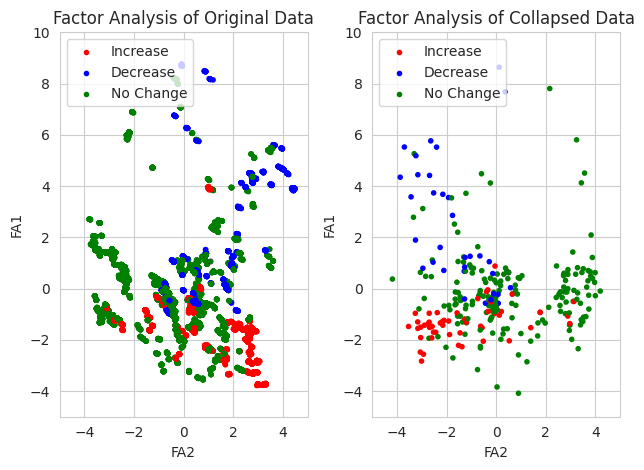

In [8]:
# We now visualize the whole dataset in 2D
plt.subplot(121)
plt.scatter(X_famd[:][1], X_famd[:][0], marker='.', c=y.astype(float), cmap=custom_cmap)
plt.title('Factor Analysis of Original Data')
plt.xlabel('FA2')
plt.ylabel('FA1')
plt.xlim(-5, 5)
plt.ylim(-5, 10)

plt.scatter(X_famd[0][1], X_famd[0][0], label="Increase", color='r', marker='.')
plt.scatter(X_famd[0][1], X_famd[0][0], label="Decrease", color='b', marker='.')
plt.scatter(X_famd[0][1], X_famd[0][0], label="No Change", color='g', marker='.')
plt.legend(loc='upper left')

plt.subplot(122)
# We now visualize the whole dataset in 2D
plt.scatter(X_famd_beta[:][1], X_famd_beta[:][0], marker='.', c=y_beta.astype(float), cmap=custom_cmap)
plt.title('Factor Analysis of Collapsed Data')
plt.xlabel('FA2')
plt.ylabel('FA1')
plt.xlim(-5, 5)
plt.ylim(-5, 10)

plt.scatter(X_famd_beta[0][1], X_famd_beta[0][0], label="Increase", color='r', marker='.')
plt.scatter(X_famd_beta[0][1], X_famd_beta[0][0], label="Decrease", color='b', marker='.')
plt.scatter(X_famd_beta[0][1], X_famd_beta[0][0], label="No Change", color='g', marker='.')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Rate over time
highlight when decision was made

Percent change stuff
look at features that rep percent change and plot those since they all have the same scale

S&P and USD

Plot the most important features and whether it goes up or down

Try plotting the regression lines like in the textbook

2_42_famd_beta_data


In [15]:
df.shape

(12525, 18)

In [20]:
df

,decision,loan,exports,pce,ue,rgdp,cars,recess,gdpd,veloc,house,mich,cli,spx,usd,fed_party,potus_party,mom
1989-08-24,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,344.700012,101.519997,1.0,1.0,-1.0
1989-08-25,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,351.519989,101.589996,1.0,1.0,-1.0
1989-08-26,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,350.519989,101.849998,1.0,1.0,-1.0
1989-08-27,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,350.519989,101.849998,1.0,1.0,-1.0
1989-08-28,0.0,10.5,4.1,3.95,5.2,3.0,16.547,0.0,3.0,7.307,1332.0,3.5,99.68832,350.519989,101.849998,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,0.0,8.5,6.0,3.64,3.7,5.2,15.863,0.0,3.5,1.511,1372.0,4.2,99.47179,4594.629883,103.269997,1.0,0.0,0.0
2023-12-05,0.0,8.5,6.0,3.64,3.7,5.2,15.863,0.0,3.5,1.511,1372.0,4.2,99.47179,4569.779785,103.639999,1.0,0.0,0.0
2023-12-06,0.0,8.5,6.0,3.64,3.7,5.2,15.863,0.0,3.5,1.511,1372.0,4.2,99.47179,4567.180176,104.050003,1.0,0.0,0.0
2023-12-07,0.0,8.5,6.0,3.64,3.7,5.2,15.863,0.0,3.5,1.511,1372.0,4.2,99.47179,4549.339844,104.150002,1.0,0.0,0.0
